# Define methods for web application
Herein, we have defined 4 functions
### 1. Plot new spectrum
Take in any spectrum as dataframe or directory and plot the 1D heatmap and/or the spectrum<br>
**Parameters:**<br> 
file or file path<br>
low_limit<br>
high_limit<br>
heatmap<br>
plot

### 2. Predict the probability of cancer or no cancer
Take in any spectrum as dataframe or directory, first plot the sample in first principle components space, then provide the probability of cancer or no cancer in a printout
#### 2.1 Plot PCA projection using first two principle components
**Parameters:**<br>
file (in pd series) or directory path<br> 
group (optional, selected from 'robotic', 'hand' and 'prostate', default 'robotic')
#### 2.2 Predict the probability of the sample being cancer or no cancer
**Parameters:**<br> 
file (in pd series) or directory path<br>
model (optional, ['svc', 'knn', 'rf', 'ensemble'], default 'svc')<br>
group (optional, ['robotic','hand','prostate'], default 'robotic')<br>
criteria (optional, ['cancer', 'no cancer'], default 'cancer')

### 3. For unknown samples
Take in any spectrum as dataframe or directory, first plot the sample in the first two principle components space, then provide the probability of samples belongs to each class according to different criteria

#### 3.1 View whether the unknown sample belongs to any group in the first two principle components space
**Parameters:**<br>
file (in pd series) or directory path
#### 3.2 Multiclassfication
**Parameters:**<br>
file (in pd series) or directory path<br>
model (optional, ['svc', 'knn', 'rf', 'ensemble'], default 'svc')<br>
criteria (optional, ['total', 'preparation', 'sex'], default 'total') <br>

### 4. Selected important molecules determining cancer
Take in group information, low_limit and high_limit, print the important mass values and plot the selected molecular mass compared with cancer/no cancer group using heatmap

**Parameters:**<br>
group (optional, ['robotic prepared ovarian', 'hand prepared ovarian', 'prostate'])<br>
low_limit (optional, should be higher than 200, default 200)<br>
high_limit (optional, should be lower than 10000, default 10000)<br>  

***

# Load Pickle files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix
import random
%matplotlib inline

In [83]:
file_list = glob.glob('pickle/*.pickle')

In [84]:
file_dic = {}
for i in file_list:
    
    # Extract the name of file
    name = re.split('[\\\.]',i)[1]
    
    # Load file to dictionary
    with open(i, 'rb') as f:
        file_dic[name] = pickle.load(f)

In [85]:
# print file_dic keys
print(file_dic.keys())

dict_keys(['df_mass_important', 'df_transform', 'ensemble_ovarian_hand', 'ensemble_ovarian_robotic', 'ensemble_predict_multiclass', 'ensemble_predict_robotic_hand', 'ensemble_predict_sex', 'ensemble_prostate', 'feature_index_ovarian', 'feature_index_ovarian_hand', 'feature_index_prostate', 'important_features_multiclass', 'important_features_robotic_hand', 'important_features_sex', 'knn_ovarian_hand', 'knn_ovarian_robotic', 'knn_predict_multiclass', 'knn_predict_robotic_hand', 'knn_predict_sex', 'knn_prostate', 'ovarian_hand', 'ovarian_hand_transformed_x_y', 'ovarian_robotic', 'ovarian_robotic_transformed_x_y', 'pca_ovarian_hand', 'pca_ovarian_robotic', 'pca_prostate', 'pca_whole_data', 'prostate', 'prostate_transformed_x_y', 'rf_ovarian_hand', 'rf_ovarian_robotic', 'rf_predict_multiclass', 'rf_predict_robotic_hand', 'rf_predict_sex', 'rf_prostate', 'svc_ovarian_hand', 'svc_ovarian_robotic', 'svc_predict_multiclass', 'svc_predict_robotic_hand', 'svc_predict_sex', 'svc_prostate', 'whole

***

# Random choose samples and take the average

In [5]:
# Cancer group prepared by robotic
index = random.choices(range(len(file_dic['ovarian_robotic'][0])), k = len(file_dic['ovarian_robotic'][0]))
cancer_robotic_mean = np.mean(file_dic['ovarian_robotic'][0].loc[index,:])

In [6]:
index = random.choices(range(len(file_dic['ovarian_robotic'][1])), k = len(file_dic['ovarian_robotic'][1]))
control_robotic_mean = np.mean(file_dic['ovarian_robotic'][1].loc[index,:])

In [7]:
index = random.choices(range(len(file_dic['ovarian_hand'][0])), k = len(file_dic['ovarian_hand'][0]))
cancer_hand_mean = np.mean(file_dic['ovarian_hand'][0].loc[index,:])

In [8]:
index = random.choices(range(len(file_dic['ovarian_hand'][1])), k = len(file_dic['ovarian_hand'][1]))
control_hand_mean = np.mean(file_dic['ovarian_hand'][1].loc[index,:])

In [9]:
index = random.choices(range(len(file_dic['prostate'][0])), k = len(file_dic['prostate'][0]))
cancer_prostate_mean = np.mean(file_dic['prostate'][0].loc[index,:])

In [10]:
index = random.choices(range(len(file_dic['prostate'][1])), k = len(file_dic['prostate'][1]))
control_prostate_mean = np.mean(file_dic['prostate'][1].loc[index,:])

***

# Define test program

In [116]:
def test(func, *args, **kwargs):
    for i in args:
        func(i, **kwargs)

***

# Define functions and testing

## 1. Plot new spectrum

Plot the raw spectrum <br>
Parameters: <br>
1. file (in pd series) or directory path
2. low_limit (optional, default 200)
3. high_limit (optional, default 10000)
4. heatmap (optional, default False)
5. plot (optional, default True)

In [12]:
def plot_spectrum(file, low_limit = 200, high_limit = 10000, heatmap = True, plot = True):
    
    if isinstance(file, str):
        file = pd.read_csv(file)
        file = file.set_index(file.columns[0]).iloc[:,0]
    
    new_file = file[(file.index > low_limit) & (file.index < high_limit)]
        
    new_file_len = new_file.shape[0]

    if heatmap and (not plot):
        plt.figure(figsize=[20,5])
        plt.title('Spectrum shown by heatmap', fontsize = 20)
        plt.imshow(new_file[np.newaxis,:], aspect="auto")
        plt.yticks([])
        plt.xticks(np.arange(0, new_file_len, new_file_len//10), cancer_robotic_mean.index[0:new_file_len:new_file_len//10])
        plt.xlabel('M/Z', fontsize = 16)

    if plot and (not heatmap):
        plt.figure(figsize=[20,5])
        plt.title('Spectrum shown by plot', fontsize = 20)
        plt.plot(np.arange(new_file_len), new_file.values)
        plt.xlim(0,new_file_len)
        plt.xticks(np.arange(0, new_file_len, new_file_len//10), new_file.index[0:new_file_len:new_file_len//10])
        plt.yticks([])
        plt.xlabel('M/Z', fontsize = 16)

    if heatmap and plot:
        plt.figure(figsize=[20,10])

        plt.subplot(2,1,1)
        plt.title('Spectrum shown by heatmap and plot', fontsize = 20)
        plt.imshow(new_file[np.newaxis,:], aspect="auto")
        plt.yticks([])
        plt.xticks([])

        plt.subplot(2,1,2)
        plt.plot(np.arange(new_file_len), new_file.values)
        plt.xlim(0,new_file_len)
        plt.xticks(np.arange(0, new_file_len, new_file_len//10), new_file.index[0:new_file_len:new_file_len//10])
        plt.yticks([])
        plt.xlabel('M/Z', fontsize = 16)

        plt.tight_layout()
        

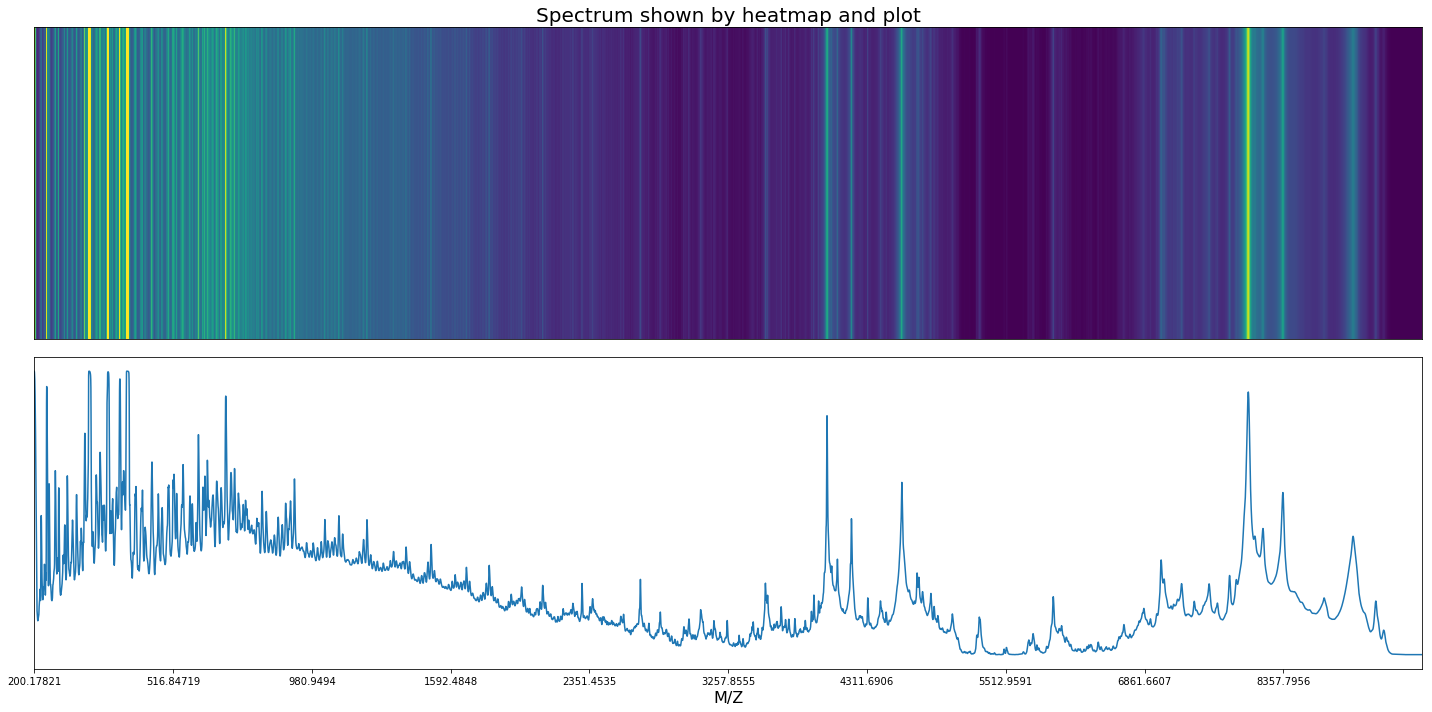

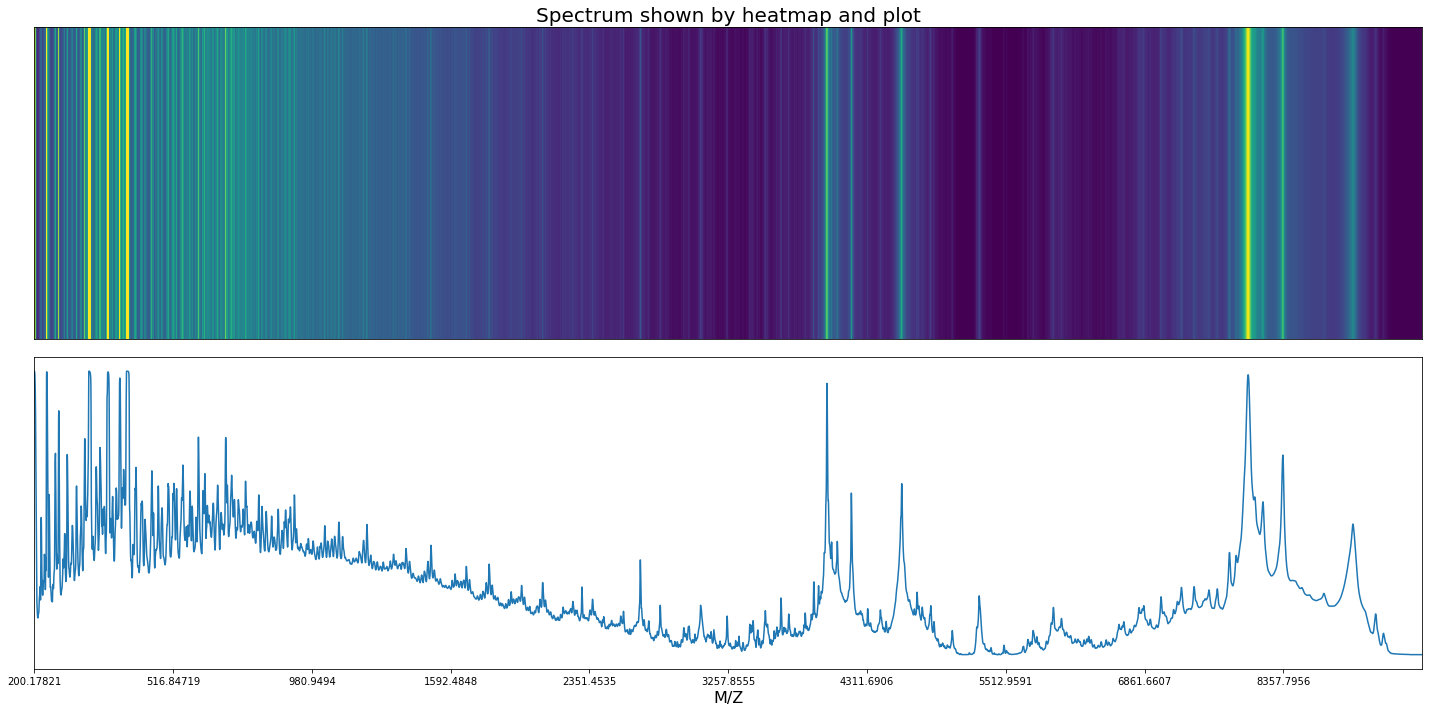

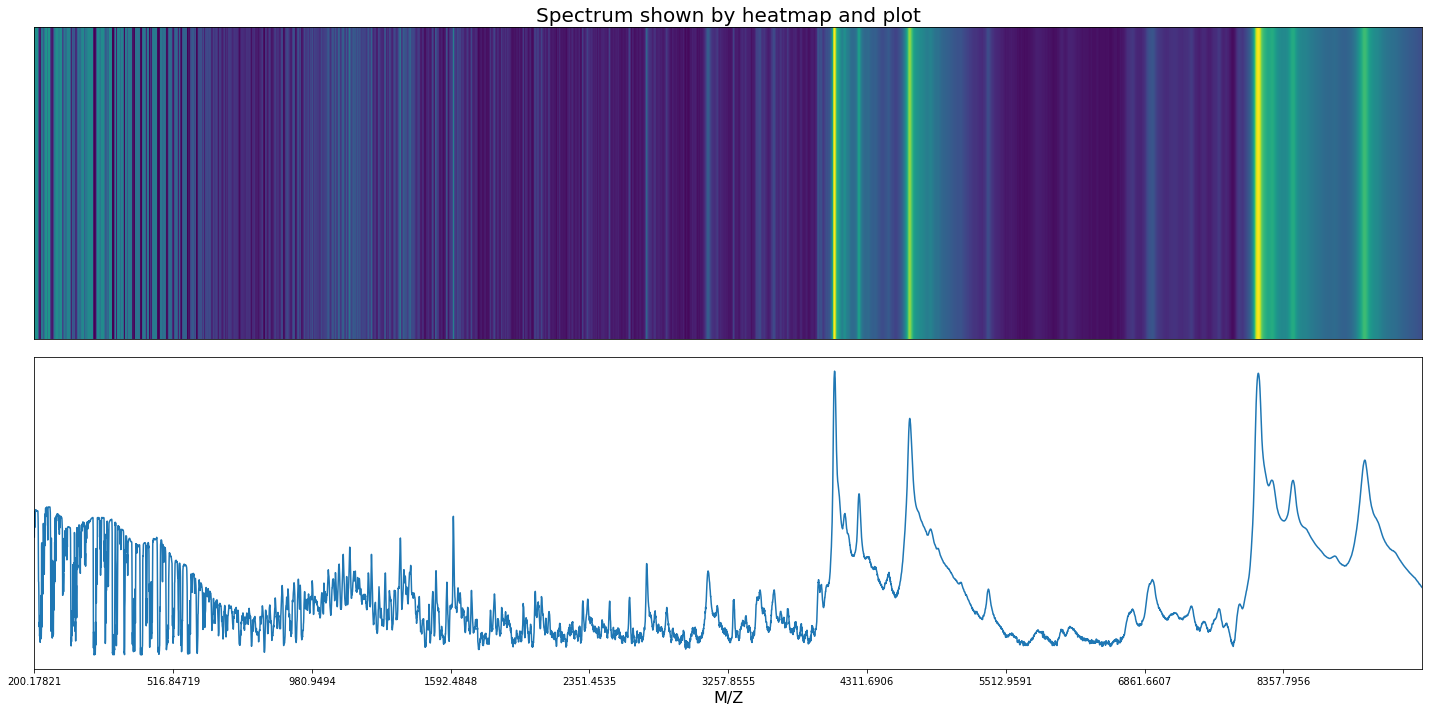

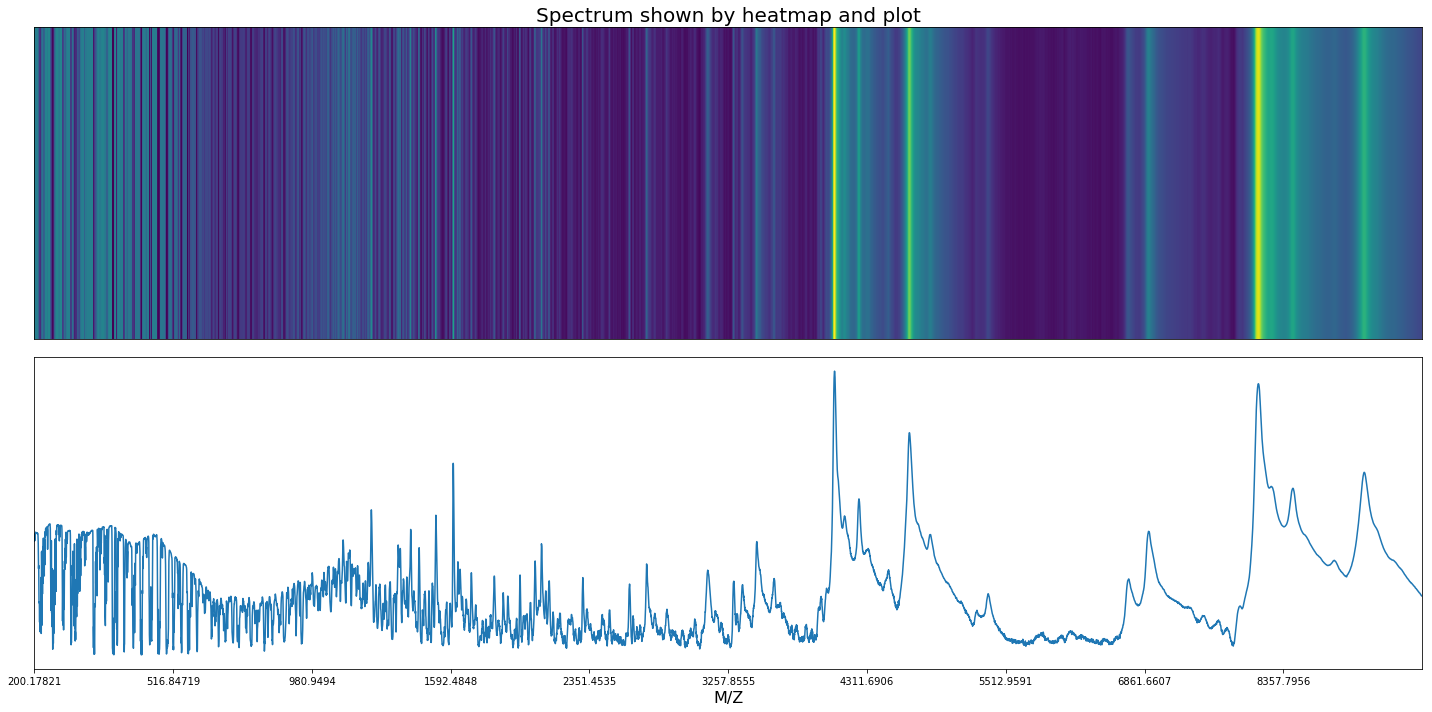

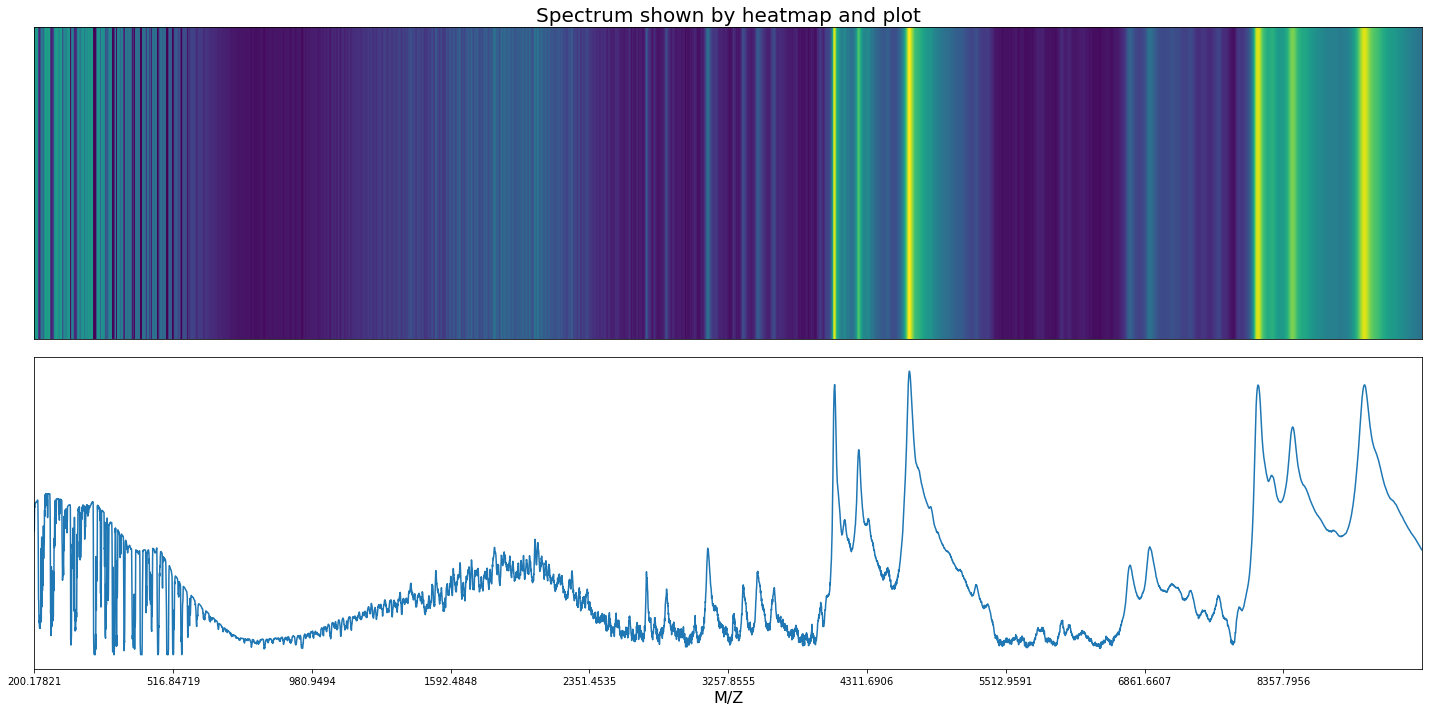

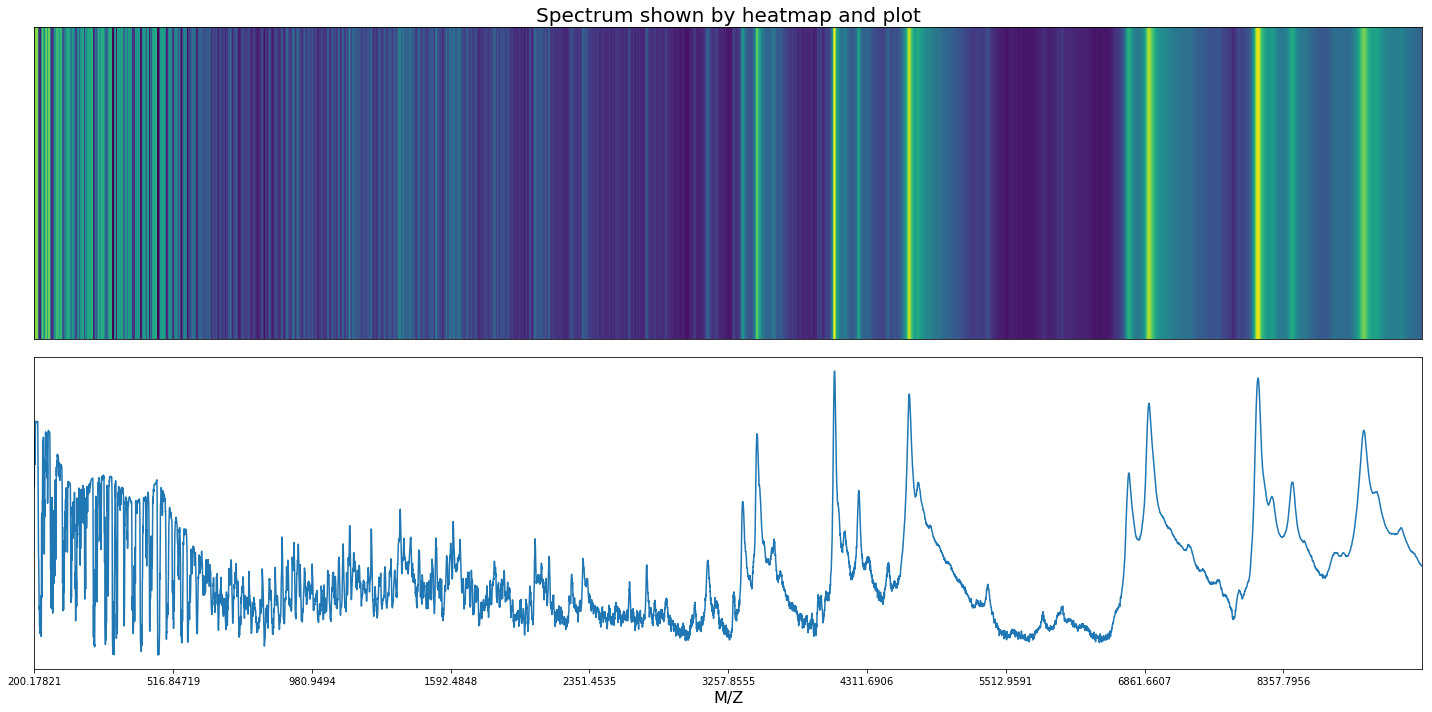

In [13]:
test(plot_spectrum, cancer_robotic_mean, control_robotic_mean, cancer_hand_mean, control_hand_mean, cancer_prostate_mean, control_prostate_mean)

## 2. Predict the probability of cancer or no cancer if given model and group

### 2.1 Plot PCA projection using first two principle components
Parameters:
1. file (in pd series) or directory path
2. group (optional, selected from 'robotic', 'hand' and 'prostate', default 'robotic')

In [14]:
# Plot projection of data using first two principle components
def data_transform(path):
    # Read csv file
    df = pd.read_csv(path)
    df.columns = ['M/Z', 'Intensity']
    
    # Select mass window between 200 and 10000
    df = df[(df['M/Z']>200) & (df['M/Z']<10000)]
    
    # Baseline substration. Substract the spectra with the median of lowest 20% intensity
    median = np.median(np.sort(df.Intensity)[:(len(df.Intensity)//5)])
    df.Intensity = df.Intensity.apply(lambda x: x-median if (x-median)>=0 else 0)
    
    # Rescale by dividing the intensity with the median of top 5% intensity and take the rootsqure
    top_median = np.median(np.sort(df.Intensity)[::-1][:(int(len(df.Intensity)*0.05))])
    df.Intensity = df.Intensity.apply(lambda x: x/top_median)
    df.Intensity = np.sqrt(df.Intensity)
    
    # Pivot table and return the resulting data frame
    df_transform= df.pivot_table(columns='M/Z')
    df_transform = df_transform.reset_index().iloc[:,1:]
    
    return df_transform

def pca_projection(file, group='robotic'):
    
    if isinstance(file, str):
        file = data_transform(file).loc[0]
        
    if group =='robotic':
        plt.figure(figsize=(5,5))
        plt.title('PCA projection of training samples in '+ group + ' samples' )
        new_file = file_dic['ovarian_robotic_transformed_x_y'][0]
        label = file_dic['ovarian_robotic_transformed_x_y'][1]
        # Tranform file using fitted pca model by robotic ovarian training set
        file_transform = file_dic['pca_ovarian_robotic'].transform(file[np.newaxis,:])
                     
        plt.scatter(new_file[:,0], new_file[:,1], c=label)
        plt.plot(file_transform[:,0], 
                 file_transform[:,1], 
                 marker = 'o', markersize = 20, color = 'red')
        plt.plot([-7.5,10],[-4, 3],'r--',linewidth = 3)
        plt.annotate('Cancer', xy = [-5,4], size = 20, color = 'red')
        plt.annotate('Control', xy = [2,-5], size = 20, color = 'green')
        plt.xlabel('PC1')
        plt.ylabel('PC2')

        
    if group == 'hand':
        plt.figure(figsize=(5,5))
        plt.title('PCA projection of training samples in '+ group + ' samples' )
        new_file = file_dic['ovarian_hand_transformed_x_y'][0]
        label = file_dic['ovarian_hand_transformed_x_y'][1]
        # Tranform file using fitted pca model by hand prepared ovarian training set
        file_transform = file_dic['pca_ovarian_hand'].transform(file[np.newaxis,:])
        
        plt.scatter(new_file[:,0], new_file[:,1], c=label)
        plt.plot(file_transform[:,0], 
                 file_transform[:,1], 
                 marker = 'o', markersize = 20, color = 'red')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    
    if group == 'prostate':
        plt.figure(figsize=(5,5))
        plt.title('PCA projection of training samples in '+ group + ' samples' )
        new_file = file_dic['prostate_transformed_x_y'][0]
        label = file_dic['prostate_transformed_x_y'][1]
        # Tranform file using fitted pca model by robotic ovarian training set
        file_transform = file_dic['pca_prostate'].transform(file[np.newaxis,:])
        
        plt.scatter(new_file[:,0], new_file[:,1], c=label)
        plt.plot(file_transform[:,0], 
                 file_transform[:,1], 
                 marker = 'o', markersize = 20, color = 'red')
        plt.plot([-10,20],[-8, 15],'r--',linewidth = 3)
        plt.annotate('Cancer', xy = [-6,6], size = 20, color = 'red')
        plt.annotate('Control', xy = [3,-6], size = 20, color = 'green')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        

### Testing for 2.1

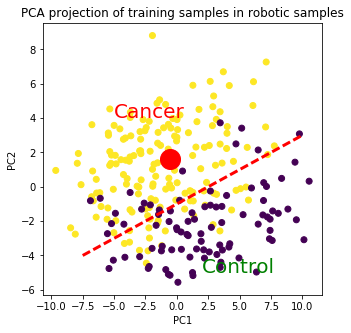

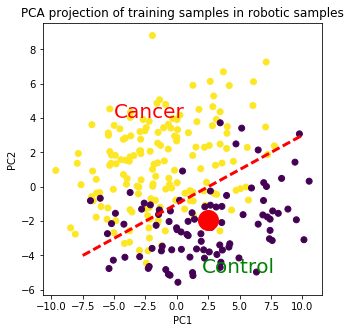

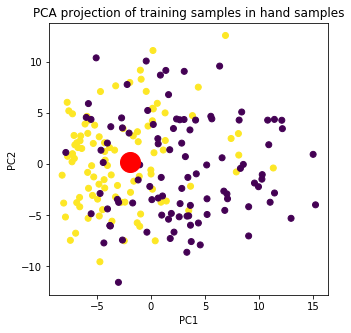

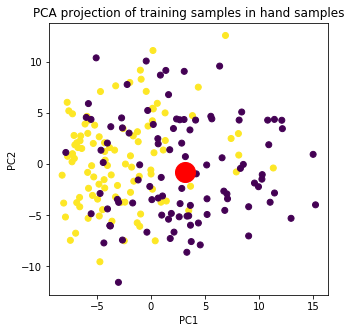

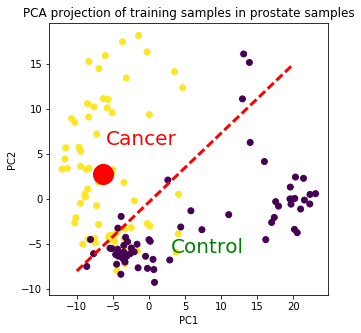

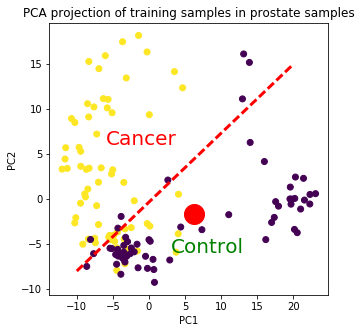

In [15]:
test(pca_projection, cancer_robotic_mean, control_robotic_mean, group = 'robotic')
test(pca_projection, cancer_hand_mean, control_hand_mean, group = 'hand')
test(pca_projection, cancer_prostate_mean, control_prostate_mean, group = 'prostate')

### 2.2 Predict the probability of the sample being cancer or no cancer
Parameters:
1. file (in pd series) or directory path
2. model (optional, ['svc', 'knn', 'rf', 'ensemble'], default 'svc')
2. group (optional, ['robotic','hand','prostate'], default 'robotic')
2. criteria (optional, ['cancer', 'no cancer'], default 'cancer')

In [16]:
# Predict the probability of the sample being cancer
def predict_cancer_proba(file, model = 'svc', group = 'robotic', criteria = 'cancer'):
    
    if isinstance(file, str):
        file = data_transform(file).loc[0]
        
    if group == 'robotic':
        
        model_robotic = {'svc':file_dic['svc_ovarian_robotic'], 
                         'knn':file_dic['knn_ovarian_robotic'], 
                         'rf':file_dic['rf_ovarian_robotic'],
                         'ensemble': file_dic['ensemble_ovarian_robotic']}
        
        important_features_robotic = file_dic['feature_index_ovarian']
        proba = model_robotic[model].predict_proba(file.iloc[important_features_robotic][np.newaxis,:])
    
        
        if criteria == 'cancer':
            print('The probability of ovarian cancer predicted by {} model is: {:.1f}%'.format(model, (proba[:,1][0]*100)))
        else:
            print('The probability of no ovarian cancer by {} model is: {:.1f}%'.format(model, (proba[:,0][0]*100)))
        
    if group == 'hand':
        
        model_hand = {'svc':file_dic['svc_ovarian_hand'], 
                      'knn':file_dic['knn_ovarian_hand'], 
                      'rf':file_dic['rf_ovarian_hand'], 
                      'ensemble': file_dic['ensemble_ovarian_hand']}
        
        important_features_hand = file_dic['feature_index_ovarian_hand']
        proba = model_hand[model].predict_proba(file.iloc[important_features_hand][np.newaxis,:])
        if criteria == 'cancer':
            print('The probability of ovarian cancer by {} model is: {:.1f}%'.format(model, (proba[:,1][0]*100)))
        else:
            print('The probability of no ovarian cancer by {} model is: {:.1f}%'.format(model, (proba[:,0][0]*100)))
        
    if group == 'prostate':
    
        model_prostate = {'svc':file_dic['svc_prostate'], 
                          'knn':file_dic['knn_prostate'], 
                          'rf':file_dic['rf_prostate'], 
                          'ensemble': file_dic['ensemble_prostate']}
        
        important_features_prostate = file_dic['feature_index_prostate']
        proba = model_prostate[model].predict_proba(file.iloc[important_features_prostate][np.newaxis,:])
        if criteria == 'cancer':
            print('The probability of prostate cancer by {} model is: {:.1f}%'.format(model, proba[:,1][0]*100))
        else:
            print('The probability of no prostate cancer by {} is: {:.1f}%'.format(model, proba[:,0][0]*100))

### Testing for 2.2

In [17]:
# Test for cancer_robotic_mean, should all show high in ovarian cancer probobility
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['cancer', 'non cancer']:
        test(predict_cancer_proba, cancer_robotic_mean, model = model, criteria = criteria)

The probability of ovarian cancer predicted by svc model is: 100.0%
The probability of no ovarian cancer by svc model is: 0.0%
The probability of ovarian cancer predicted by knn model is: 100.0%
The probability of no ovarian cancer by knn model is: 0.0%
The probability of ovarian cancer predicted by rf model is: 100.0%
The probability of no ovarian cancer by rf model is: 0.0%
The probability of ovarian cancer predicted by ensemble model is: 100.0%
The probability of no ovarian cancer by ensemble model is: 0.0%


In [18]:
# Test for cancer_robotic_mean, should all show high in non ovarian cancer probobility
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['cancer', 'non cancer']:
        test(predict_cancer_proba, control_robotic_mean, model = model, criteria = criteria)

The probability of ovarian cancer predicted by svc model is: 0.1%
The probability of no ovarian cancer by svc model is: 99.9%
The probability of ovarian cancer predicted by knn model is: 0.0%
The probability of no ovarian cancer by knn model is: 100.0%
The probability of ovarian cancer predicted by rf model is: 0.0%
The probability of no ovarian cancer by rf model is: 100.0%
The probability of ovarian cancer predicted by ensemble model is: 0.0%
The probability of no ovarian cancer by ensemble model is: 100.0%


In [19]:
# Test for cancer_hand_mean, should all show high in ovarian cancer probobility
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['cancer', 'non cancer']:
        test(predict_cancer_proba, cancer_hand_mean, model = model, criteria = criteria, group = 'hand')

The probability of ovarian cancer by svc model is: 100.0%
The probability of no ovarian cancer by svc model is: 0.0%
The probability of ovarian cancer by knn model is: 100.0%
The probability of no ovarian cancer by knn model is: 0.0%
The probability of ovarian cancer by rf model is: 99.0%
The probability of no ovarian cancer by rf model is: 1.0%
The probability of ovarian cancer by ensemble model is: 100.0%
The probability of no ovarian cancer by ensemble model is: 0.0%


In [20]:
# Test for cancer_hand_mean, should all show high in non ovarian cancer probobility
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['cancer', 'non cancer']:
        test(predict_cancer_proba, control_hand_mean, model = model, criteria = criteria, group = 'hand')

The probability of ovarian cancer by svc model is: 0.1%
The probability of no ovarian cancer by svc model is: 99.9%
The probability of ovarian cancer by knn model is: 0.0%
The probability of no ovarian cancer by knn model is: 100.0%
The probability of ovarian cancer by rf model is: 1.0%
The probability of no ovarian cancer by rf model is: 99.0%
The probability of ovarian cancer by ensemble model is: 0.7%
The probability of no ovarian cancer by ensemble model is: 99.3%


In [21]:
# Test for cancer_prostate_mean, should all show high in ovarian cancer probobility
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['cancer', 'non cancer']:
        test(predict_cancer_proba, cancer_prostate_mean, model = model, criteria = criteria, group = 'prostate')

The probability of prostate cancer by svc model is: 99.2%
The probability of no prostate cancer by svc is: 0.8%
The probability of prostate cancer by knn model is: 100.0%
The probability of no prostate cancer by knn is: 0.0%
The probability of prostate cancer by rf model is: 98.0%
The probability of no prostate cancer by rf is: 2.0%
The probability of prostate cancer by ensemble model is: 98.4%
The probability of no prostate cancer by ensemble is: 1.6%


In [22]:
# Test for cancer_prostate_mean, should all show high innon ovarian cancer probobility
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['cancer', 'non cancer']:
        test(predict_cancer_proba, control_prostate_mean, model = model, criteria = criteria, group = 'prostate')

The probability of prostate cancer by svc model is: 0.7%
The probability of no prostate cancer by svc is: 99.3%
The probability of prostate cancer by knn model is: 0.0%
The probability of no prostate cancer by knn is: 100.0%
The probability of prostate cancer by rf model is: 0.0%
The probability of no prostate cancer by rf is: 100.0%
The probability of prostate cancer by ensemble model is: 0.3%
The probability of no prostate cancer by ensemble is: 99.7%


## 3. For unknown samples

### 3.1 View whether the unknown sample belongs to any group in the first two principle components space
parameters:<br>
file (in pd series) or directory path

In [23]:
def view_relation(file):
    if isinstance(file, str):
        file = data_transform(file).loc[0]
        
    xdata_transform = file_dic['whole_data_multiclass'][0]
    ylabels = file_dic['whole_data_multiclass'][1]
    file_transform = file_dic['pca_whole_data'].transform(file[np.newaxis,:])
    plt.figure()
    plt.title('Sample Projection in the First Two Principle Components Space')
    plt.scatter(xdata_transform[:,0],xdata_transform[:,1], c = ylabels, cmap='jet')
    plt.plot([-12,0],[15,-5], 'r--', linewidth = 3)
    plt.annotate('Female',xy = [-10,-8], fontsize = 15, fontweight = 'bold', color = 'r')
    plt.annotate('Male', xy = [-8,15], fontsize = 15, fontweight = 'bold', color = 'g')
    plt.plot(file_transform[:,0], file_transform[:,1], color = 'red', marker= 'o', markersize = 20)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.colorbar()

### Test 3.1

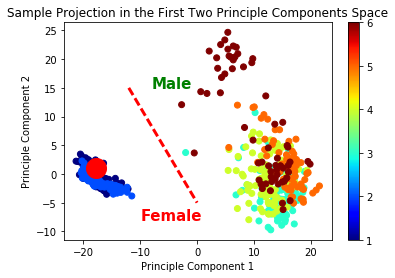

In [24]:
# Test for file path
test(view_relation, 'Database used\OvarianDataset_Robotic Handled\Cancer\Ovarian Cancer daf-0601.csv')

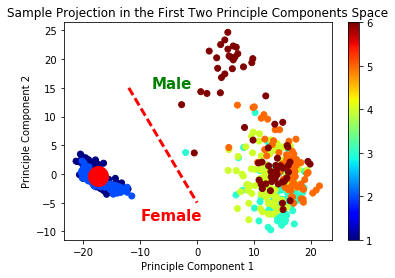

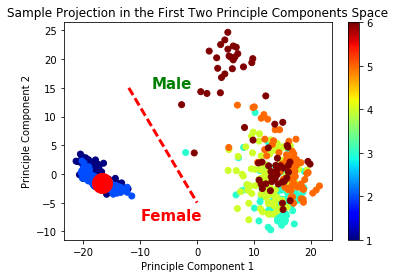

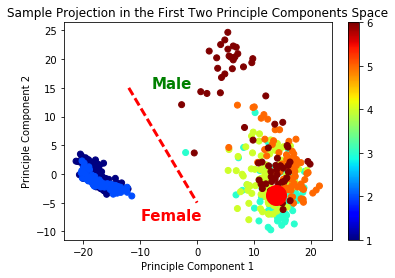

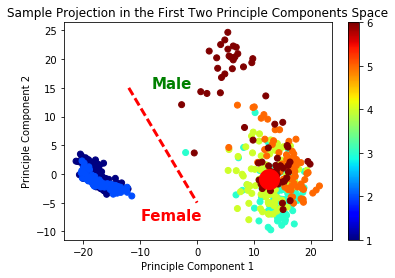

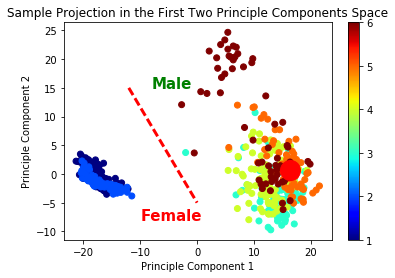

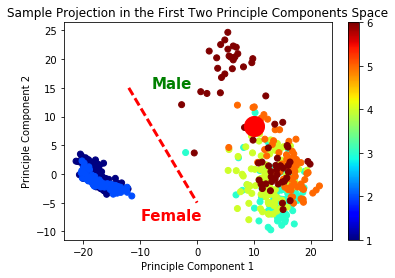

In [25]:
# Test for file
test(view_relation, cancer_robotic_mean, control_robotic_mean, cancer_hand_mean, control_hand_mean, cancer_prostate_mean, control_prostate_mean)

### 3.2 Multiclassification

In [26]:
# Prediction of which group it is
def predict_proba_multiclass(file, model = 'svc', criteria = 'total'):
    if isinstance(file, str):
        file = data_transform(file).loc[0]
        
    if criteria == 'sex':
        proba = pd.DataFrame(columns = ['Female', 'Male'])
        important_index = file_dic['important_features_sex']
        
        if model == 'svc':
            svc = file_dic['svc_predict_sex']
            proba.loc[0] = svc.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(2), proba.values[0], width = 0.3)
            plt.xticks(np.arange(2), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')

        if model == 'knn':
            knn = file_dic['knn_predict_sex']
            proba.loc[0] = knn.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(2), proba.values[0], width = 0.3)
            plt.xticks(np.arange(2), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')

        if model == 'rf':
            rf = file_dic['rf_predict_sex']
            proba.loc[0] = rf.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(2), proba.values[0], width = 0.3)
            plt.xticks(np.arange(2), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')
        
        if model == 'ensemble':
            ensemble = file_dic['ensemble_predict_sex']
            proba.loc[0] = ensemble.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(2), proba.values[0], width = 0.3)
            plt.xticks(np.arange(2), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')
    
    if criteria == 'preparation':
        proba = pd.DataFrame(columns = ['Robotic', 'Hand'])
        important_index = file_dic['important_features_robotic_hand']
        
        if model == 'svc':
            svc = file_dic['svc_predict_robotic_hand']
            proba.loc[0] = svc.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(2), proba.values[0], width = 0.3)
            plt.xticks(np.arange(2), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')

        if model == 'knn':
            knn = file_dic['knn_predict_robotic_hand']
            proba.loc[0] = knn.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(2), proba.values[0], width = 0.3)
            plt.xticks(np.arange(2), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')

        if model == 'rf':
            rf = file_dic['rf_predict_robotic_hand']
            proba.loc[0] = rf.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(2), proba.values[0], width=0.3)
            plt.xticks(np.arange(2), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')
        
        if model == 'ensemble':
            ensemble = file_dic['ensemble_predict_robotic_hand']
            proba.loc[0] = ensemble.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(2), proba.values[0], width=0.3)
            plt.xticks(np.arange(2), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')
                        
    if criteria =='total':
        proba = pd.DataFrame(columns = ['robotic ovarian cancer', 'robotic control',
                                        'hand ovarian cancer','hand control',
                                        'prostate cancer','prostate control'])
        important_index = file_dic['important_features_multiclass']
        
        if model == 'svc':
            svc = file_dic['svc_predict_multiclass']
            proba.loc[0] = svc.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(6), proba.values[0], width = 0.3)
            plt.xticks(np.arange(6), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')

        if model == 'knn':
            knn = file_dic['knn_predict_multiclass']
            proba.loc[0] = knn.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(6), proba.values[0], width = 0.3)
            plt.xticks(np.arange(6), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')

        if model == 'rf':
            rf = file_dic['rf_predict_multiclass']
            proba.loc[0] = rf.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(6), proba.values[0], width = 0.3)
            plt.xticks(np.arange(6), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')
            
        if model == 'ensemble':
            ensemble = file_dic['ensemble_predict_multiclass']
            proba.loc[0] = ensemble.predict_proba(file.iloc[important_index][np.newaxis,:])[0]
            plt.figure()
            plt.bar(np.arange(6), proba.values[0], width=0.3)
            plt.xticks(np.arange(6), proba.columns, rotation = 60)
            plt.ylabel('Probability')
            plt.xlabel('Groups')

### 3.2 Testing

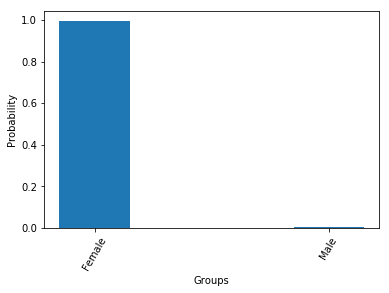

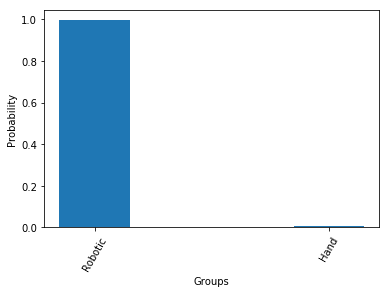

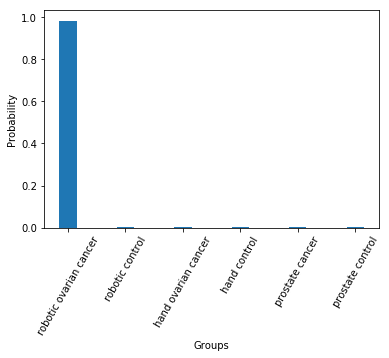

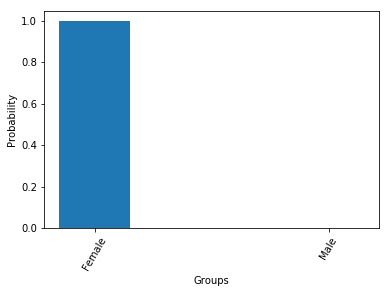

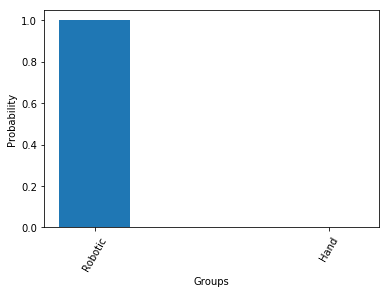

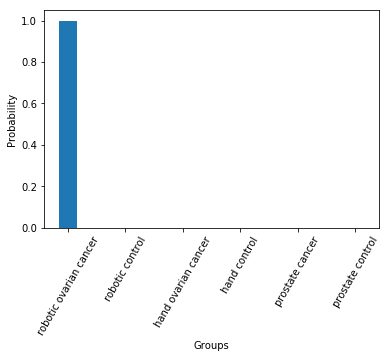

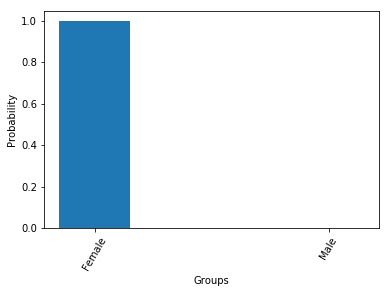

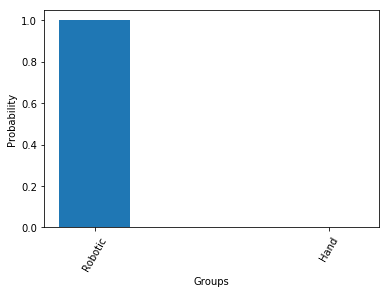

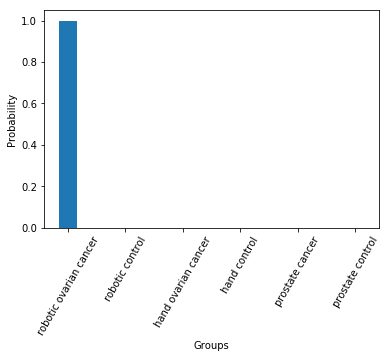

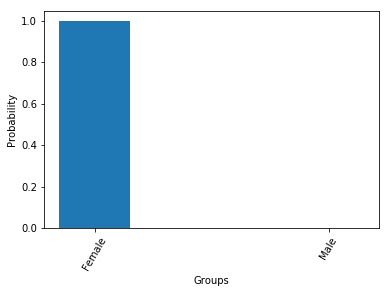

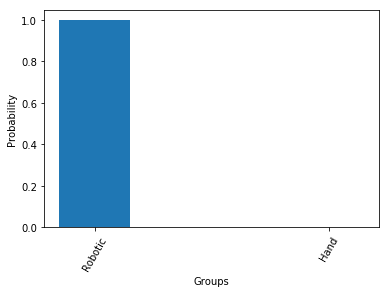

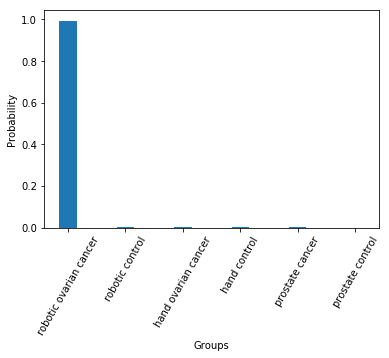

In [31]:
# Should be high probability in female, robotic and robotic ovarian cancer
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['sex', 'preparation', 'total']:
        test(predict_proba_multiclass, cancer_robotic_mean,
             model= model, 
             criteria = criteria)

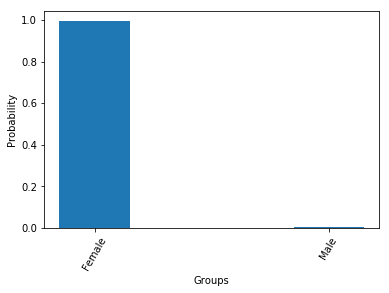

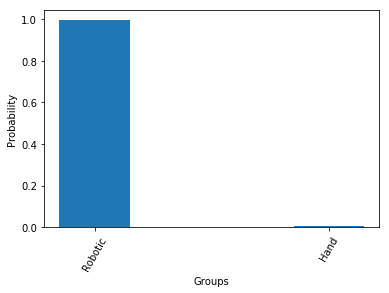

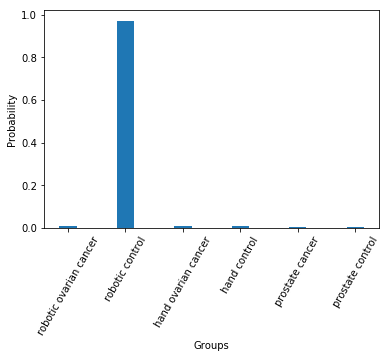

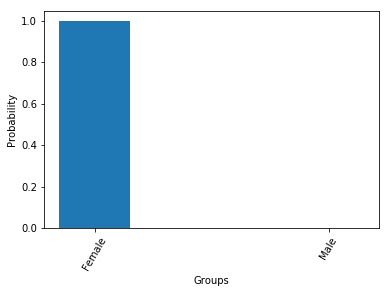

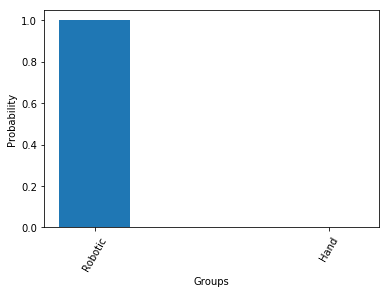

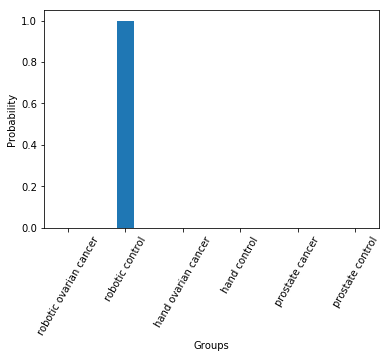

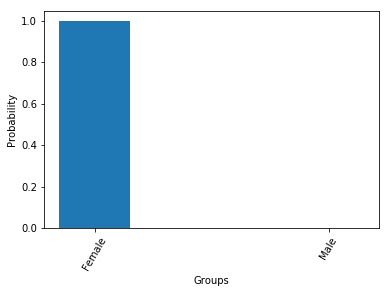

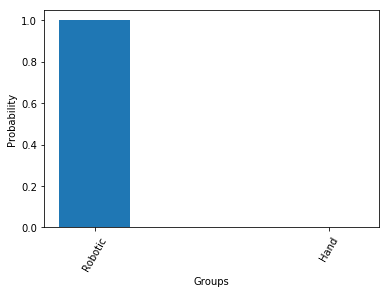

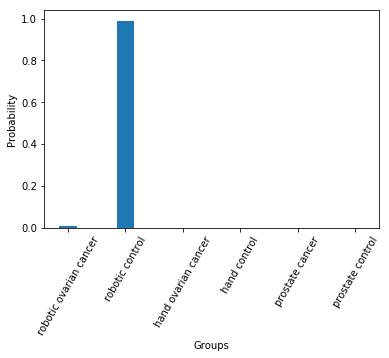

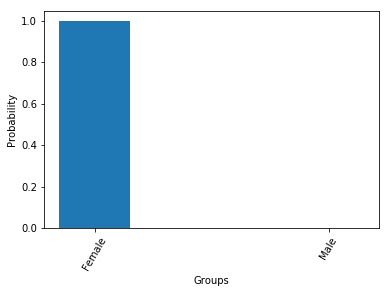

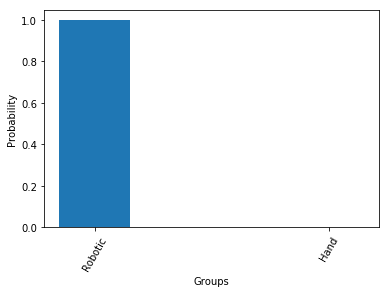

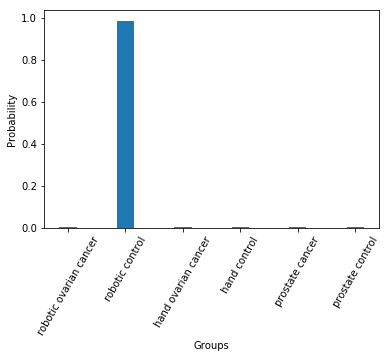

In [32]:
# Should be high probability in female, robotic and robotic ovarian control
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['sex', 'preparation', 'total']:
        test(predict_proba_multiclass, control_robotic_mean,
             model= model, 
             criteria = criteria)

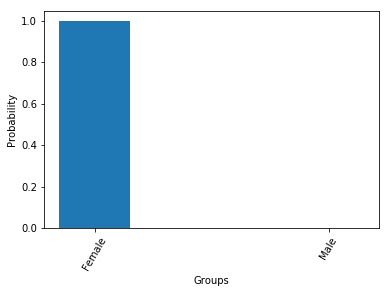

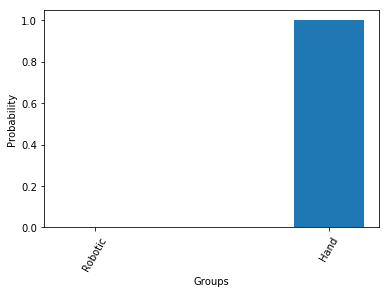

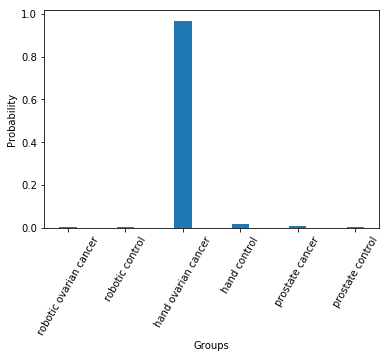

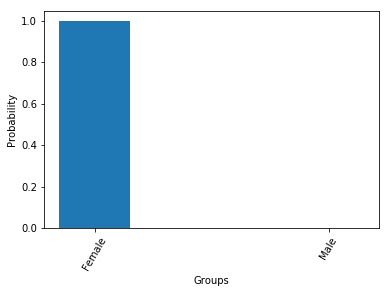

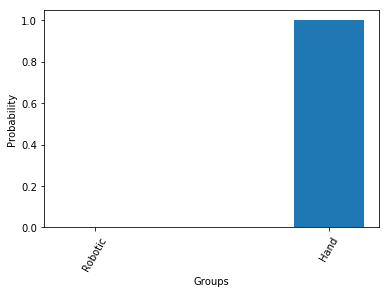

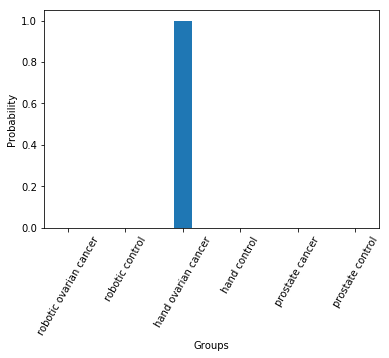

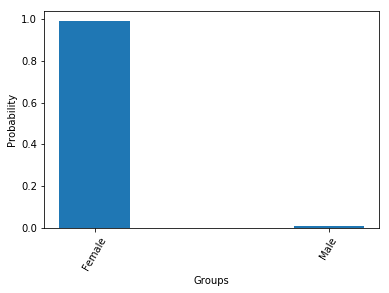

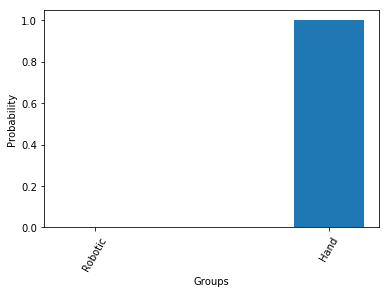

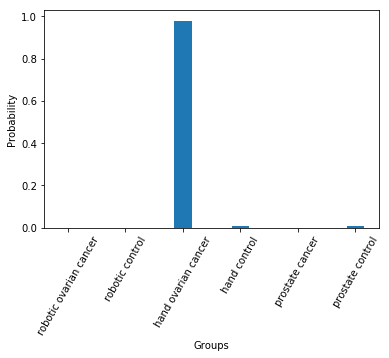

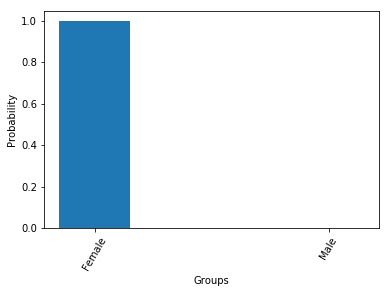

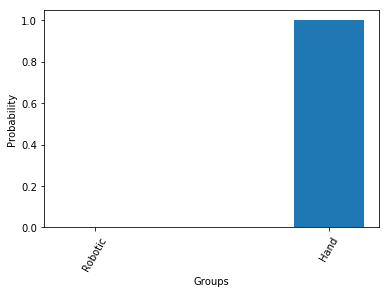

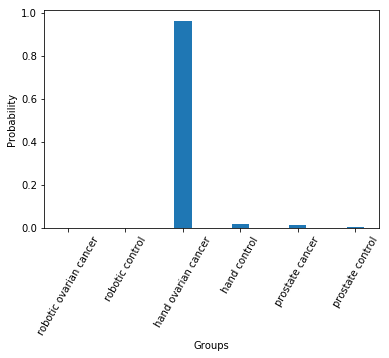

In [33]:
# Should be high probability in female, hand and hand ovarian cancer
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['sex', 'preparation', 'total']:
        test(predict_proba_multiclass, cancer_hand_mean,
             model= model, 
             criteria = criteria)

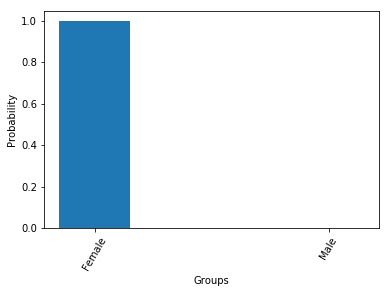

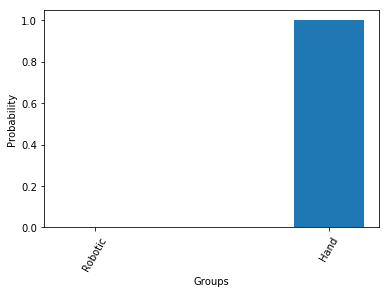

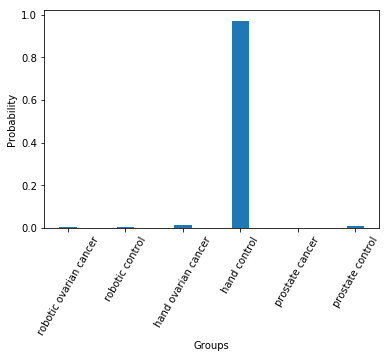

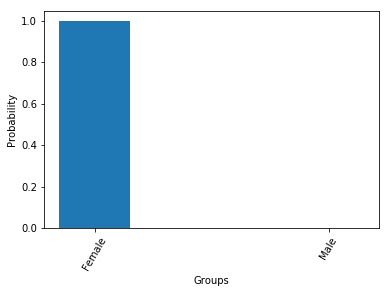

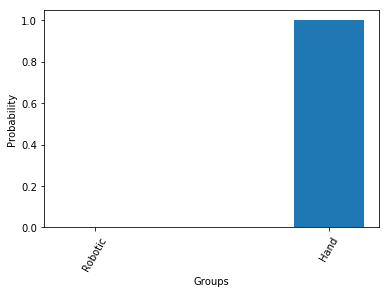

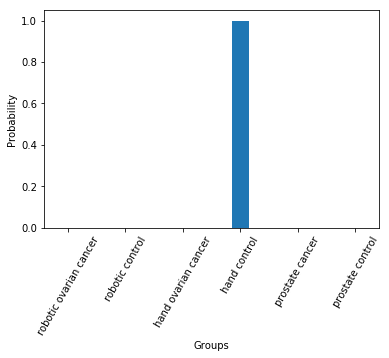

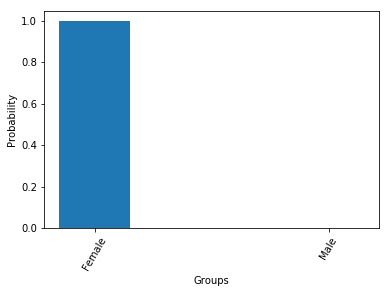

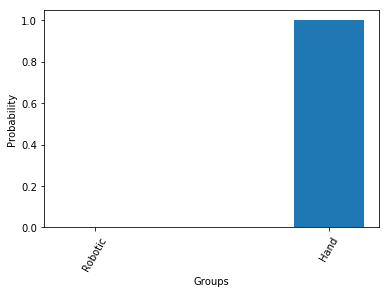

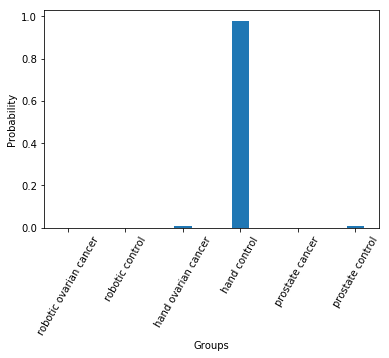

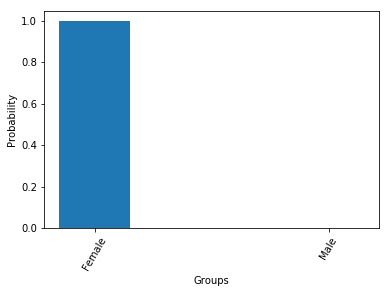

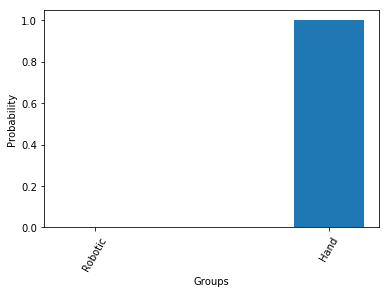

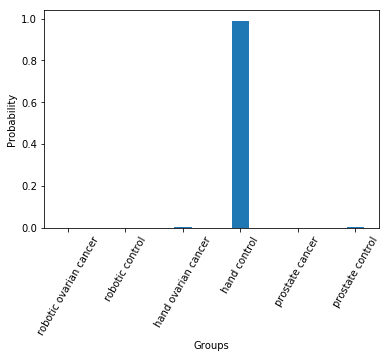

In [34]:
# Should be high probability in female, hand and hand ovarian control
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['sex', 'preparation', 'total']:
        test(predict_proba_multiclass, control_hand_mean,
             model= model, 
             criteria = criteria)

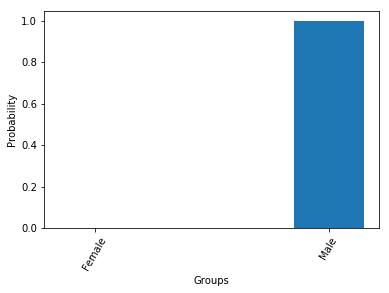

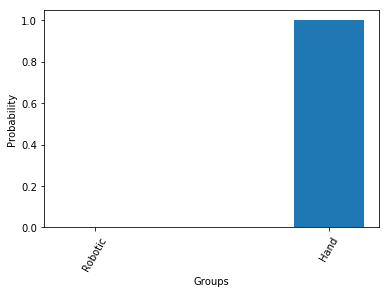

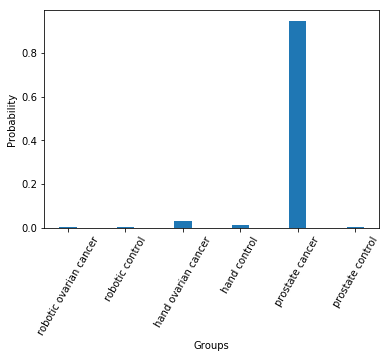

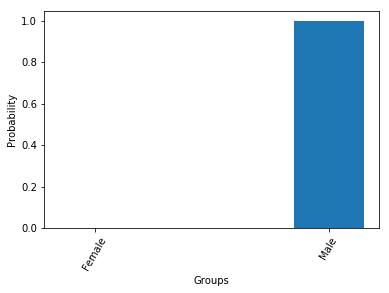

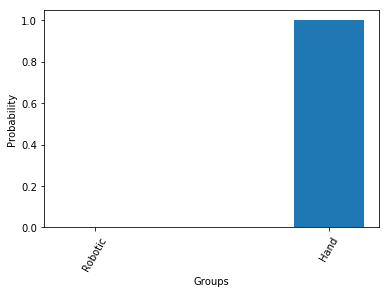

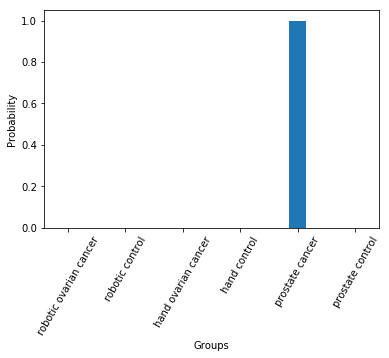

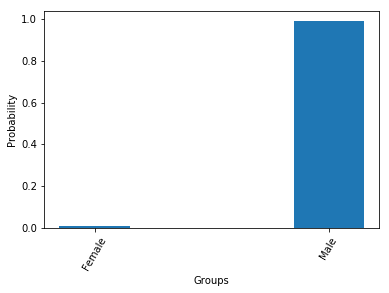

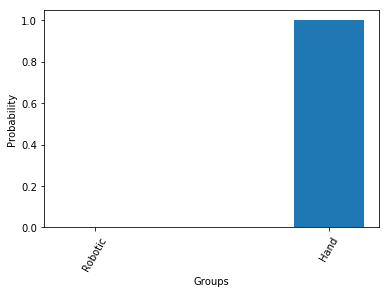

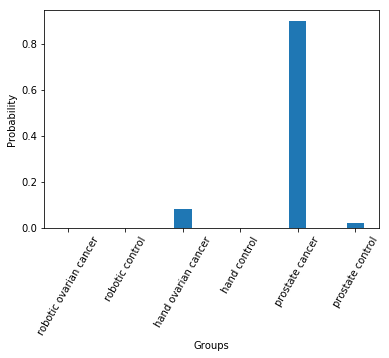

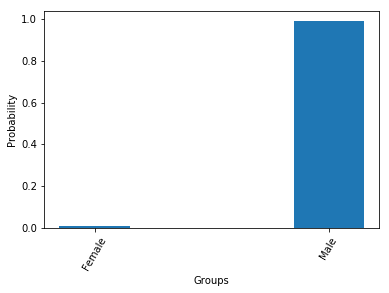

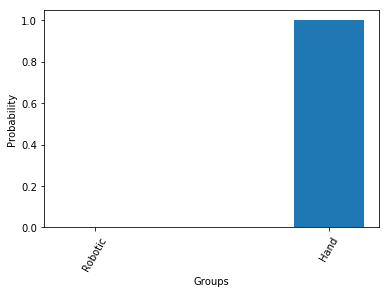

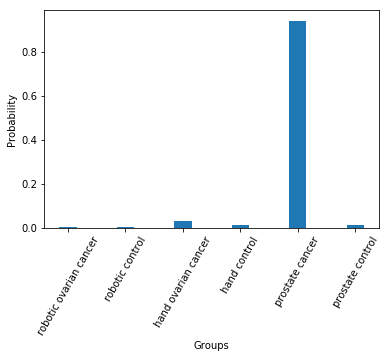

In [35]:
# Should be high probability in male, hand and prostate cancer
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['sex', 'preparation', 'total']:
        test(predict_proba_multiclass, cancer_prostate_mean,
             model= model, 
             criteria = criteria)

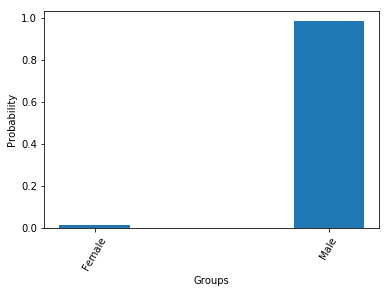

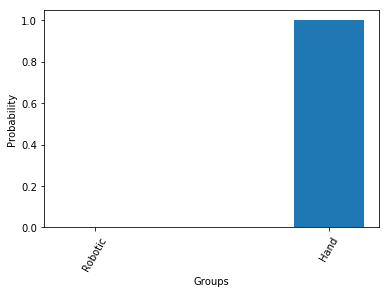

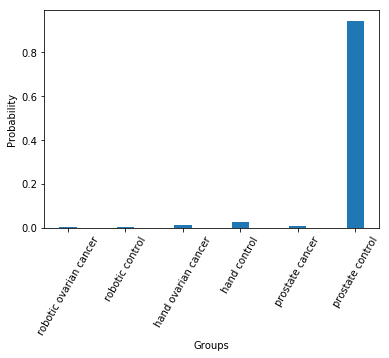

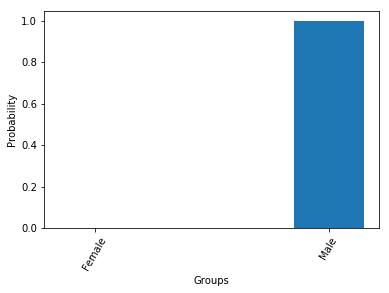

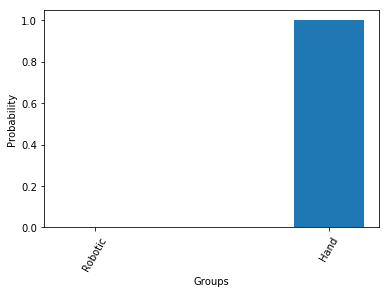

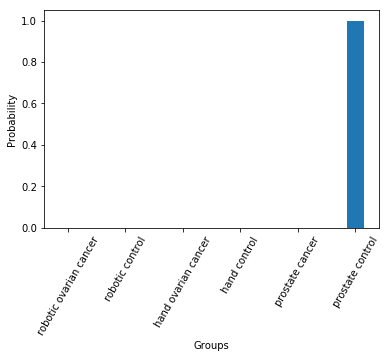

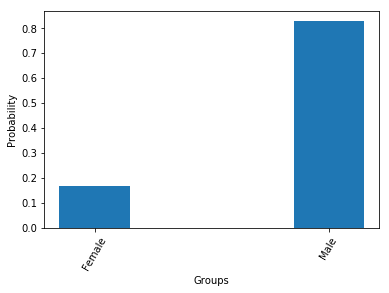

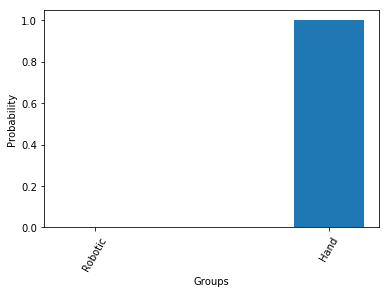

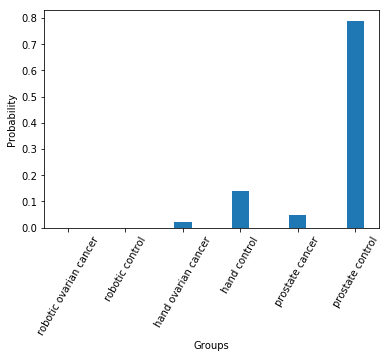

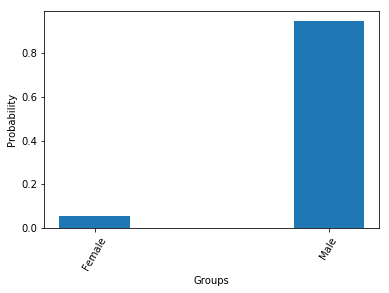

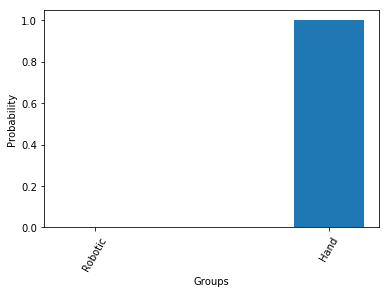

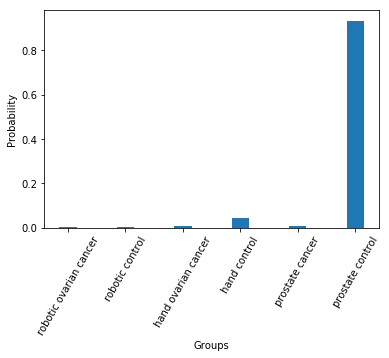

In [36]:
# Should be high probability in male, hand and prostate control
for model in ['svc', 'knn','rf', 'ensemble']:
    for criteria in ['sex', 'preparation', 'total']:
        test(predict_proba_multiclass, control_prostate_mean,
             model= model, 
             criteria = criteria)

## 4. Selected important molecules determining cancer

In [101]:
def plot_select_molecules(group, df_mass_important, cancer_robotic_mean, control_robotic_mean):
    plt.figure(figsize=(20,6))
    plt.subplot(3,1,1)
    plt.title('Selected important molecules for ' + group + ' samples', fontsize = 20)
    plt.imshow(df_mass_important, aspect='auto')
    _ = plt.xticks(np.arange(0,len(df_mass_important.columns), 
                             len(df_mass_important.columns)//10),
                   df_mass_important.columns[0:len(df_mass_important.columns):len(df_mass_important.columns)//10])
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3,1,2)
    plt.title('Full load spectrum by meaning ' + group + ' cancer samples', fontsize = 20)
    plt.imshow(cancer_robotic_mean[np.newaxis,:], aspect='auto')
    _ = plt.xticks(np.arange(0,len(cancer_robotic_mean), 
                             len(cancer_robotic_mean)//10),
                   cancer_robotic_mean.index[0:len(cancer_robotic_mean):len(cancer_robotic_mean)//10])
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3,1,3)
    plt.title('Full load spectrum by meaning ' + group + ' control samples', fontsize = 20)
    plt.imshow(control_robotic_mean[np.newaxis,:], aspect='auto')
    _ = plt.xticks(np.arange(0,len(control_robotic_mean), 
                             len(control_robotic_mean)//10),
                   control_robotic_mean.index[0:len(control_robotic_mean):len(control_robotic_mean)//10])

    plt.xlabel('M/Z', fontsize = 20)
    plt.yticks([])
    
    plt.tight_layout()

def select_molecules(group = 'robotic prepared ovarian', low_limit = 200, high_limit = 10000):
    if (low_limit < 200) | (high_limit >10000):
        raise ValueError('Should input mass between 200 to 10000')
        
    mass = file_dic['df_mass_important'].copy()
    
    if group == 'robotic prepared ovarian':
        
        mass.iloc[0,file_dic['feature_index_ovarian']]=1
        mass = mass.loc[:, mass.columns[(mass.columns>low_limit) & (mass.columns<high_limit)]]
        
        cancer_robotic_mean_new = cancer_robotic_mean[(cancer_robotic_mean.index>low_limit) & 
                                                  (cancer_robotic_mean.index<high_limit)]
        control_robotic_mean_new = control_robotic_mean[(control_robotic_mean.index>low_limit)&
                                                    (control_robotic_mean.index<high_limit)]
        
        mass_important = mass.columns[mass.loc[0]==1]
        print('The number of selected molecules between {} and {} are: {}'.format(low_limit, high_limit, len(mass_important)))
        print('\n')
        print('The molecular weights of selected molecules are: \n{}'.format(list(mass_important.astype(int))))
        plot_select_molecules(group, mass, cancer_robotic_mean_new, control_robotic_mean_new)

    if group == 'hand prepared ovarian':
        mass.iloc[0, file_dic['feature_index_ovarian_hand']]=1
        mass = mass.loc[:, mass.columns[(mass.columns>low_limit) & (mass.columns<high_limit)]]
        
        cancer_hand_mean_new = cancer_hand_mean[(cancer_hand_mean.index>low_limit) & 
                                                  (cancer_hand_mean.index<high_limit)]
        control_hand_mean_new = control_hand_mean[(control_hand_mean.index>low_limit)&
                                                    (control_hand_mean.index<high_limit)]
        
        mass_important = mass.columns[mass.loc[0]==1]
        print('The number of selected molecules between {} and {} are: {}'.format(low_limit, high_limit, len(mass_important)))
        print('\n')
        print('The molecular weights of selected molecules are: \n{}'.format(list(mass_important.astype(int))))

        plot_select_molecules(group, mass, cancer_hand_mean_new, control_hand_mean_new)
        
    if group == 'prostate':
        mass.iloc[0, file_dic['feature_index_prostate']] = 1
        mass = mass.loc[:, mass.columns[(mass.columns>low_limit) & (mass.columns<high_limit)]]
        
        cancer_prostate_mean_new = cancer_prostate_mean[(cancer_prostate_mean.index>low_limit) & 
                                                  (cancer_prostate_mean.index<high_limit)]
        control_prostate_mean_new = control_prostate_mean[(control_prostate_mean.index>low_limit)&
                                                    (control_prostate_mean.index<high_limit)]
        
        mass_important = mass.columns[mass.loc[0]==1]
        print('The number of selected molecules between {} and {} are: {}'.format(low_limit, high_limit, len(mass_important)))
        print('\n')
        print('The molecular weights of selected molecules are: \n{}'.format(list(mass_important.astype(int))))
        
        plot_select_molecules(group, mass, cancer_prostate_mean_new, control_prostate_mean_new)

###  4.1 Testing

The number of selected molecules between 200 and 1000 are: 25


The molecular weights of selected molecules are: 
[245, 247, 295, 321, 434, 435, 435, 435, 436, 440, 472, 508, 554, 555, 620, 628, 628, 632, 634, 652, 669, 691, 831, 833, 967]
--------------------
The number of selected molecules between 200 and 5000 are: 35


The molecular weights of selected molecules are: 
[245, 247, 295, 321, 434, 435, 435, 435, 436, 440, 472, 508, 554, 555, 620, 628, 628, 632, 634, 652, 669, 691, 831, 833, 967, 1015, 2364, 3315, 3675, 4432, 4822, 4880, 4954, 4962, 4993]
--------------------
The number of selected molecules between 500 and 1000 are: 14


The molecular weights of selected molecules are: 
[508, 554, 555, 620, 628, 628, 632, 634, 652, 669, 691, 831, 833, 967]
--------------------
The number of selected molecules between 500 and 5000 are: 24


The molecular weights of selected molecules are: 
[508, 554, 555, 620, 628, 628, 632, 634, 652, 669, 691, 831, 833, 967, 1015, 2364, 3315, 3675, 443

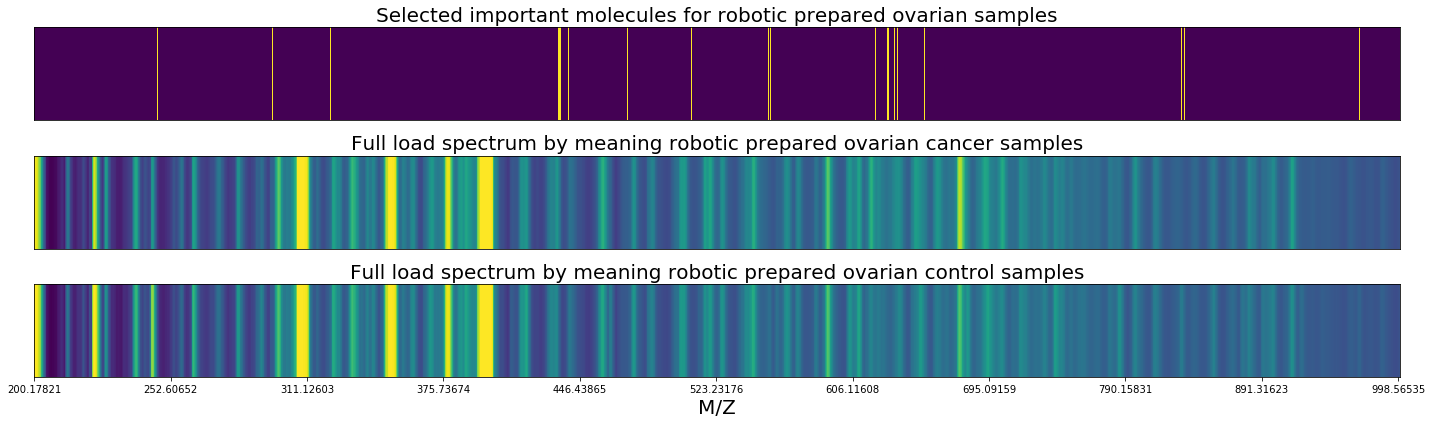

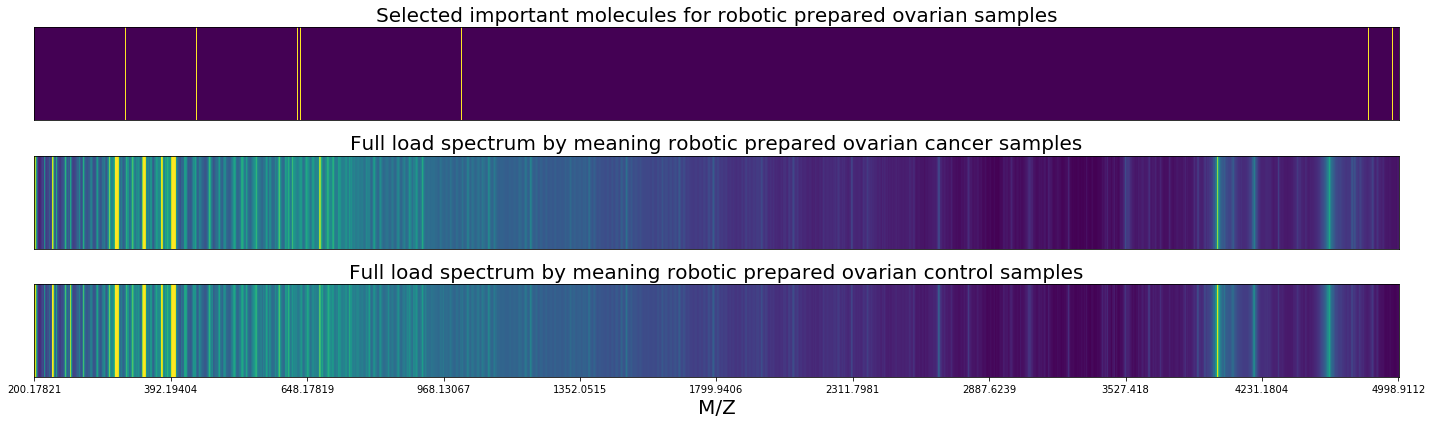

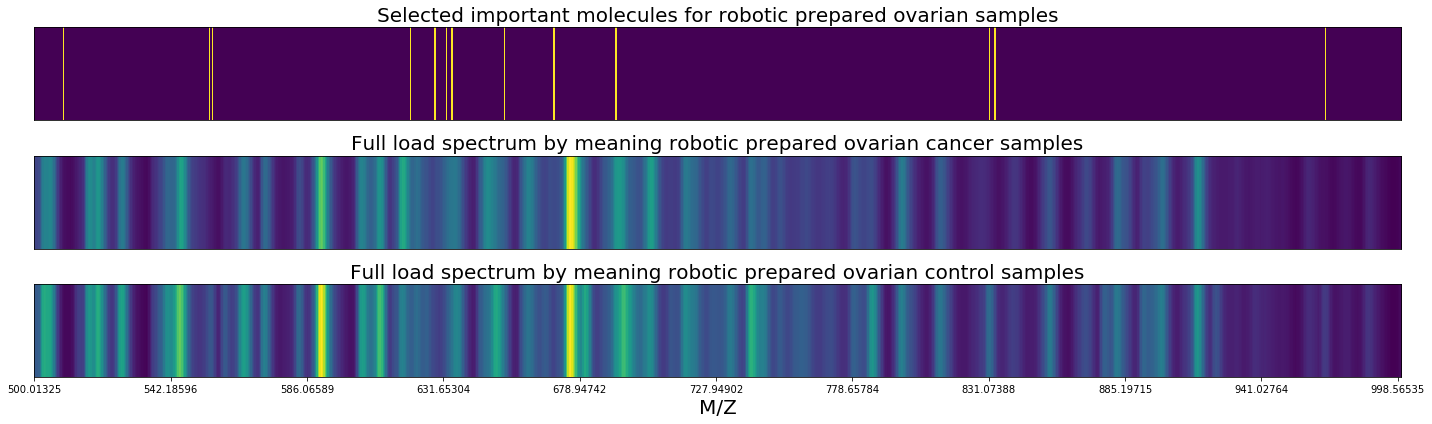

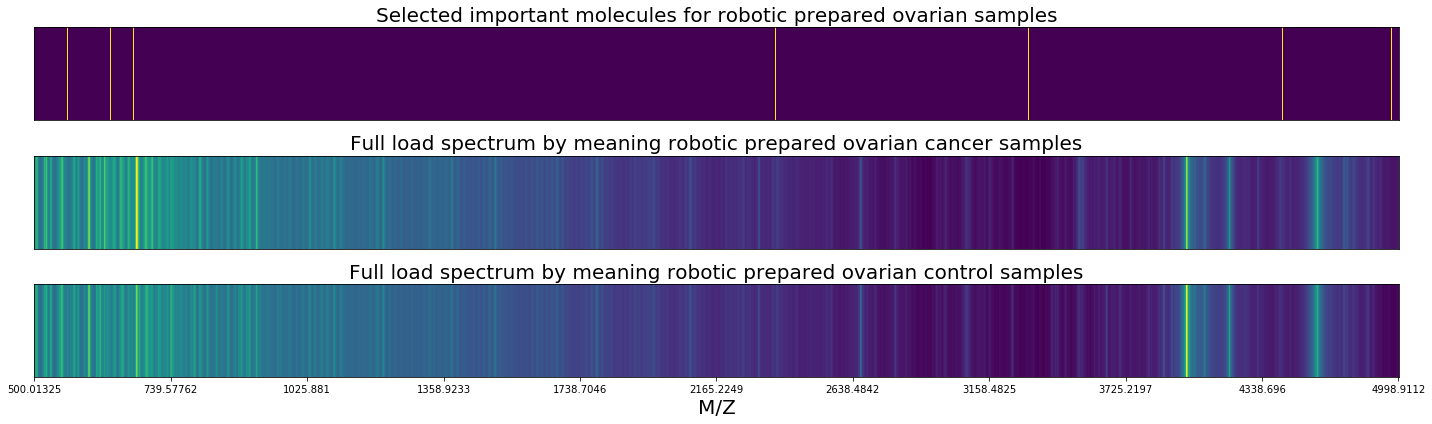

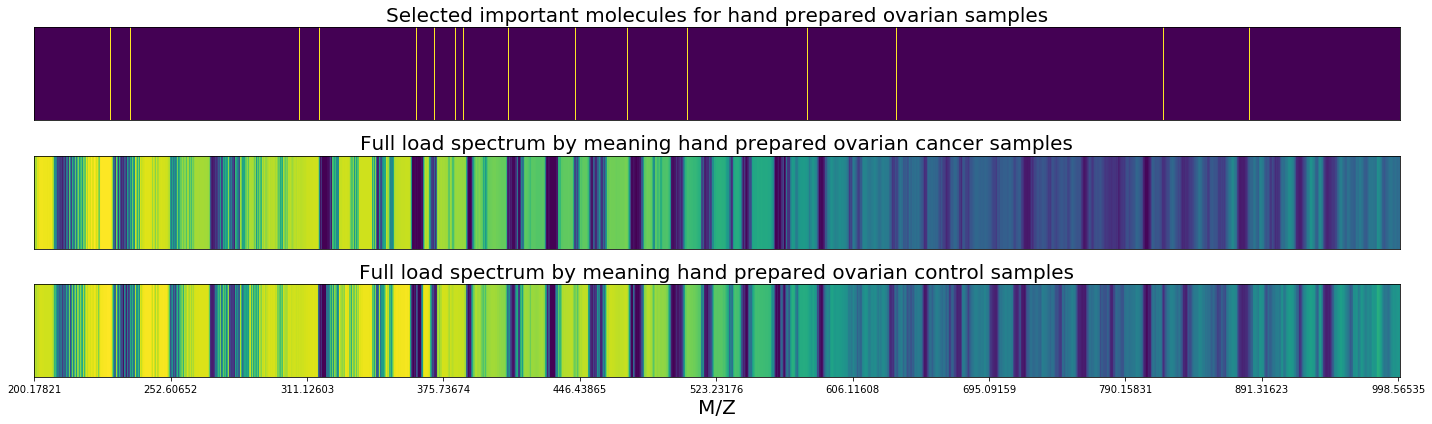

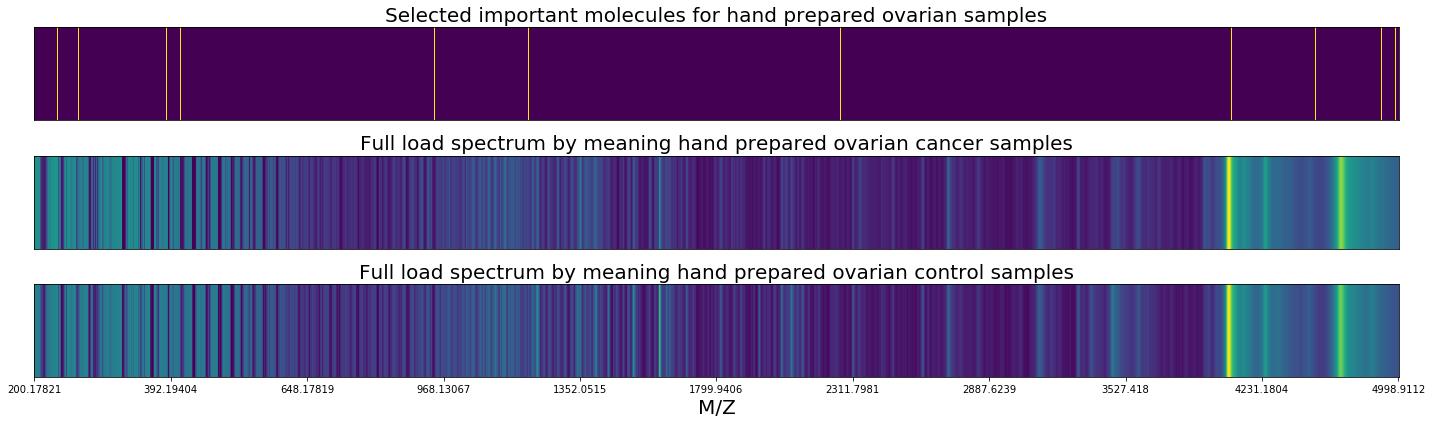

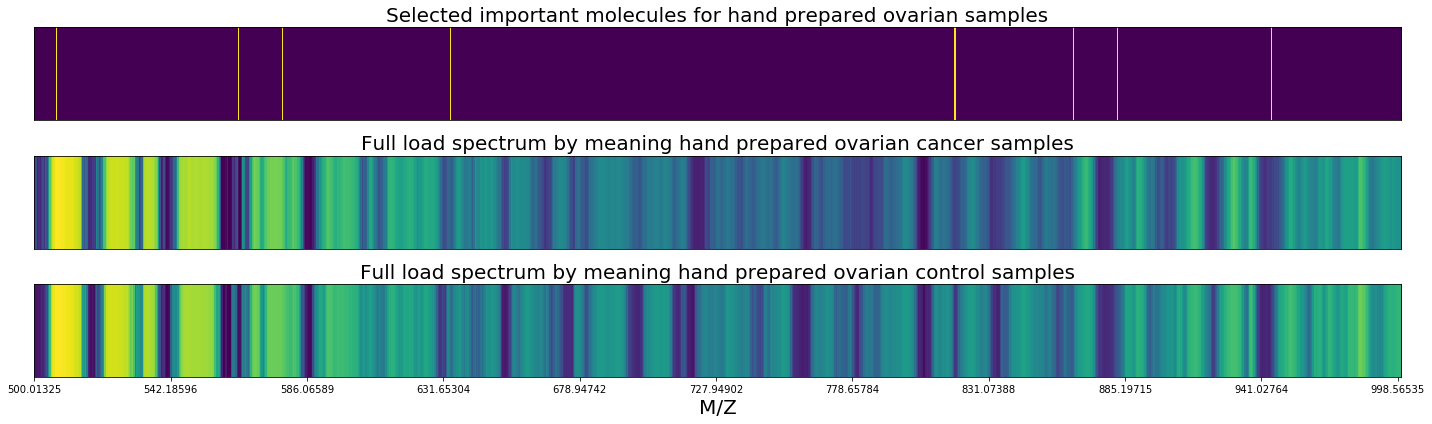

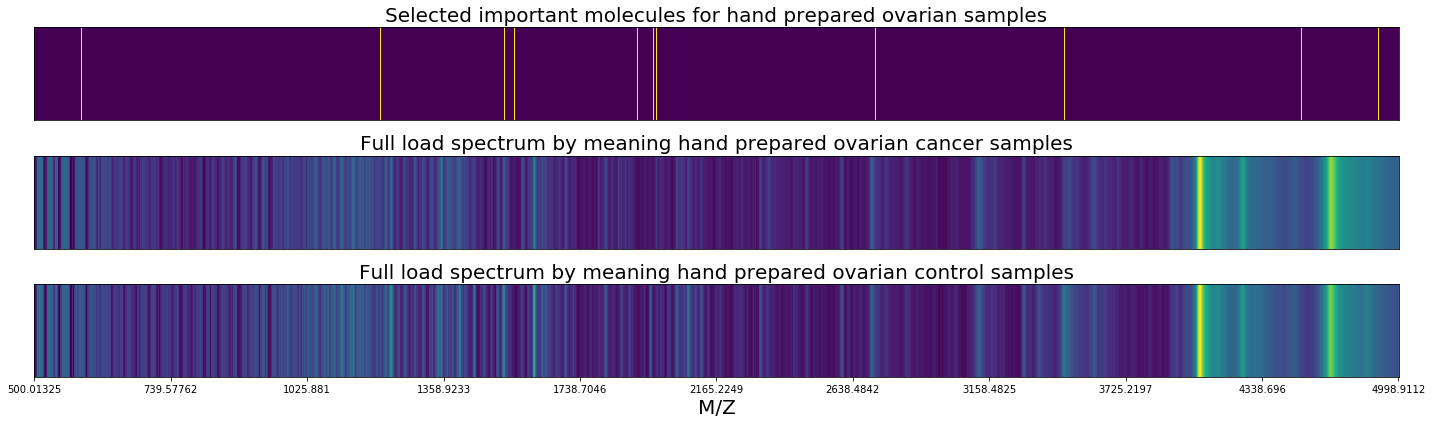

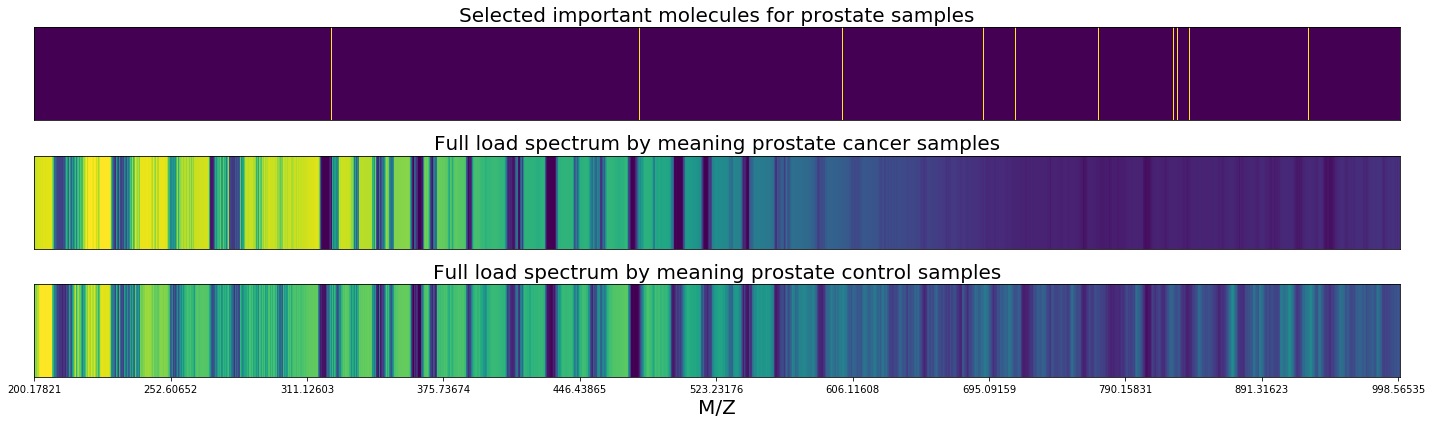

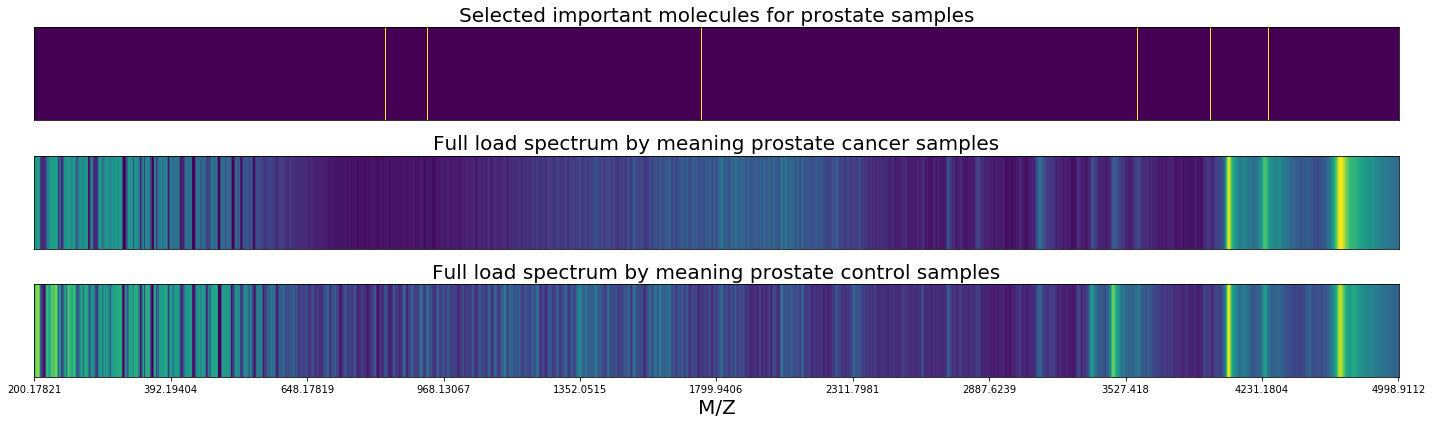

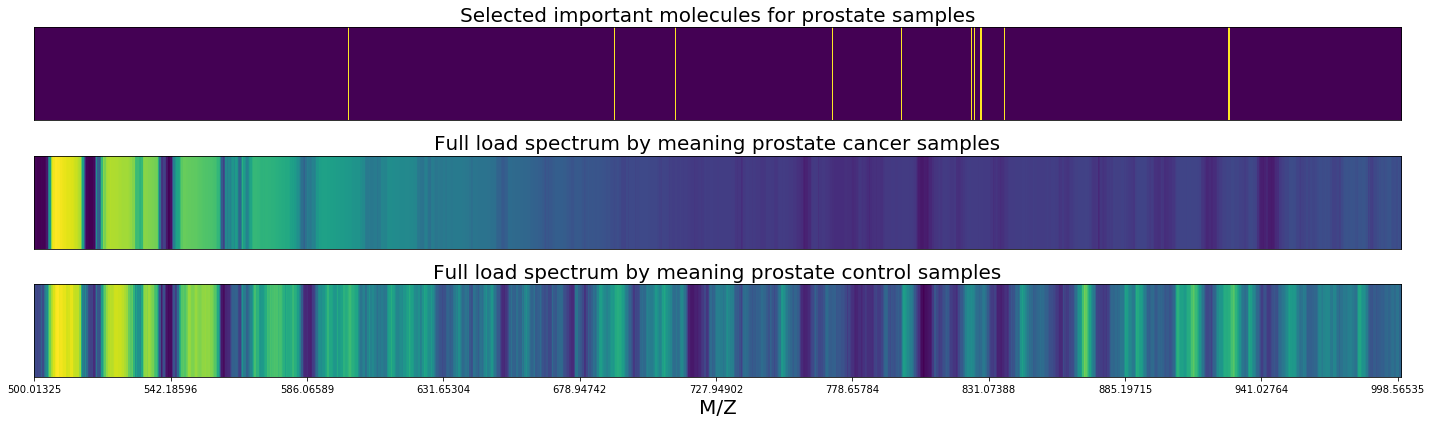

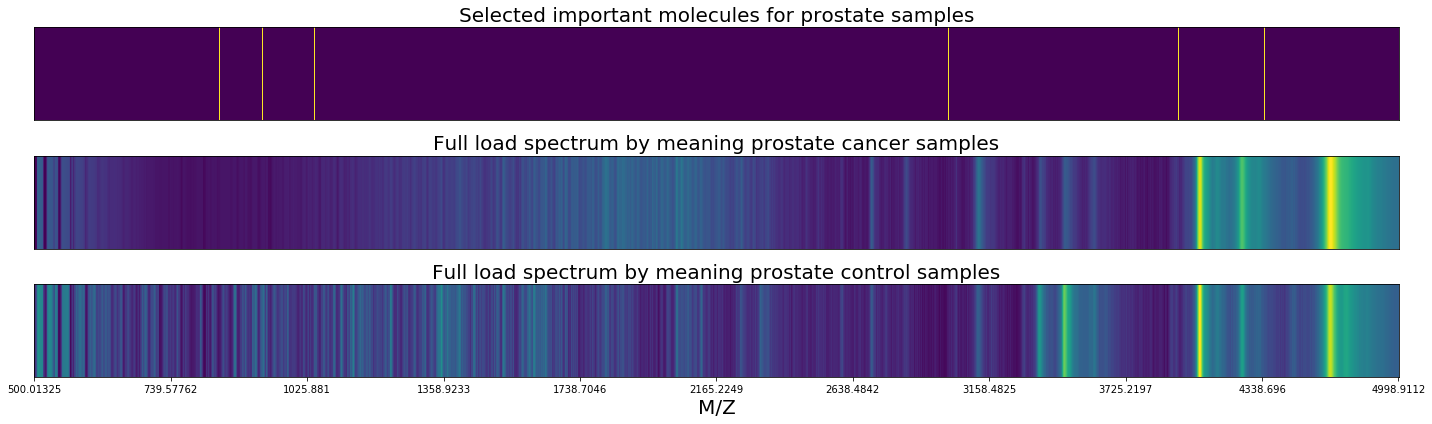

In [120]:
# Vary group range, low_limit, and high_limit
for i in ['robotic prepared ovarian', 'hand prepared ovarian', 'prostate']:
    for j in [200, 500]:
        for k in [1000, 5000]:
            select_molecules(group = i, low_limit=j, high_limit=k)
            print('--'*10)